In [24]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
Eoff=2.0
Ts=collect(300.0:10.0:900.0)
xs=collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)
x=0.6
var0=[Ts[1],x]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

bandX3=parBandTx(effMassX3(var0),0.0,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),0.0,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)
#bndstTx=BandStrucTx([bandLH,bandX3],var0)

effMassesX1=Array{Float64}(length(xs),length(Ts))
effMassesX3=Array{Float64}(length(xs),length(Ts))

EX1s=Array{Float64}(length(xs),length(Ts))
EX3s=Array{Float64}(length(xs),length(Ts))

NII=1e12*1e6
vartau0=[bandX3.effMass,Ts[1],1.0,x,1.5,bandX3,NII,bndstTx]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, var[6]:band, var[7]:NII var[8]:bndst
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauII(var)=tauII_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]))

tauTOTTx=tau_electron_B([tauAC,tauPOP2,tauII2],vartau0)#tauAC,tauII2,tauPOP2
#tauTOTTx=tau_electron_B([tauAC],vartau0)

#tauACs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauPOPs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauIIs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauTOTs=Array{Float64}(length(xs),length(Ts),length(Es))
#tauplot=Array{Float64}(length(Es))

numofn=[-1.75e20,-1.25e20,-1.03e20,-3.0e19]#Sample 1 -3.0e19, Sample 2 -1.25e20, Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
Efxs=collect(0.0:0.01:3.0)
eqvaluem=Array{Float64}(length(Ts),length(Efxs))
EfcalcM=Array{Float64}(length(Ts))
eqvalue=Array{Float64}(length(Ts))
eqvalue=Array{Float64}(length(Ts))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))
numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutnp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutTOT=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))
taugetTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))
bandX3out=Array{Float64}(length(Es),length(Ts),length(numofn))
bandX1out=Array{Float64}(length(Es),length(Ts),length(numofn))
bandLHout=Array{Float64}(length(Es),length(Ts),length(numofn))
bandHHout=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDX1out=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDX3out=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDLHout=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaX3out=Array{Float64}(length(Ts),length(numofn))
sigmaLHout=Array{Float64}(length(Ts),length(numofn))
sigmabandsout=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
seebeckbandsout=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
xSn=x
##Mg2Si Nv=1 tau(AC,POP2,II2) N-=8e19 
#Efinput=[0.1751,0.17395,0.1725,0.1708,0.16885,0.16665,0.1642,0.1615,0.15855,0.15535,0.15185,0.14815,0.1442]
##
##Mg2Si Nv=2 tau(AC,POP2,II2) N-=6e19 
#Efinput=[0.107,0.1048,0.10225,0.0993,0.09595,0.0922,0.0881,0.0836,0.0788,0.0736,0.06815,0.06235,0.05625]
##
##Mg2Si Nv=3 tau(AC,POP2,II2) N-=6e19 
#Efinput=[0.07835,0.07535,0.07185,0.0679,0.06345,0.0585,0.05315,0.0474,0.04125,0.03475,0.0279,0.02065,0.01315]
##

##Mg2Si Nv=1 tau(AC,POP2,II2) N-=6e19 
##Efinput=[0.14335,0.14175,0.1399,0.13775,0.1353,0.13255,0.12945,0.1261,0.12245,0.11845,0.11425,0.1097,0.10495]
##
##Mg2Si Nv=1 tau(AC,POP2,II2) N-=3e19
#Efinput=[0.08605,0.0833,0.0801,0.0764,0.0723,0.06775,0.06275,0.0574,0.05165,0.04555,0.0391,0.0323,0.0252]
##
##Mg2Si Nv=2 tau(AC,POP2,II2) N-=3e19
#Efinput=[0.04685,0.04235,0.0372,0.03145,0.02515,0.0183,0.01095,0.000315,-0.000505,-0.00137,-0.0227,-0.0321,-0.04185]
##
##Mg2Sn Nv 1 N-=3e19
##Efinput=[0.08605,0.0833,0.0801,0.07645,0.0723,0.06775,0.0628, 0.0574,0.05165,0.04555, 0.0391, 0.0323, 0.0252]
##

0.6

In [25]:
for (j,Tx) in enumerate(Ts) 
    bndstTx.var[1]=Tx    
    tauTOTTx.variables[2]=Tx    
    types.updatebnstTx(bndstTx)   
    for (k,nx) in enumerate(numofn)
        tauTOTTx.variables[7]=nx*1e6
        Efs[j,k]=Fermilevel_n(nx,bndstTx,Tx,xmax) # Efinput[j]+Eoff#
        numofnsout[j,k]=NumofnMultiBand(bndstTx,Efs[j,k],Tx,xmax)    
    end
end

In [26]:
for (j,Tx) in enumerate(Ts) 
    bndstTx.var[1]=Tx    
    tauTOTTx.variables[2]=Tx    
    types.updatebnstTx(bndstTx)    
    for (k,nx) in enumerate(numofn)
        @time sigmas[j,k]=sigma_Multiband(tauTOTTx,bndstTx,Efs[j,k],Tx)
        @time seebecks[j,k]=seebeck_MultibandFast(tauTOTTx,bndstTx,Efs[j,k],Tx,sigmas[j,k])
        #seebeck_Multiband(tauTOTTx,bndstTx,Efs[j,k],Tx)
    end
end

 11.780175 seconds (321.03 M allocations: 4.802 GB, 17.67% gc time)
 11.494187 seconds (322.89 M allocations: 4.828 GB, 17.88% gc time)
 11.897494 seconds (332.68 M allocations: 4.975 GB, 18.15% gc time)
 11.764449 seconds (331.00 M allocations: 4.950 GB, 18.13% gc time)
 12.386126 seconds (348.29 M allocations: 5.211 GB, 18.01% gc time)
 12.319382 seconds (348.75 M allocations: 5.217 GB, 18.17% gc time)
 12.331031 seconds (348.03 M allocations: 5.208 GB, 18.03% gc time)
 11.766922 seconds (335.15 M allocations: 5.015 GB, 18.31% gc time)
 11.026908 seconds (307.36 M allocations: 4.596 GB, 17.97% gc time)
 10.940619 seconds (306.53 M allocations: 4.584 GB, 18.12% gc time)
 10.701460 seconds (297.63 M allocations: 4.451 GB, 18.10% gc time)
 10.333939 seconds (292.16 M allocations: 4.370 GB, 18.13% gc time)
 11.249577 seconds (314.04 M allocations: 4.696 GB, 18.15% gc time)
 11.173063 seconds (314.15 M allocations: 4.698 GB, 18.12% gc time)
 13.312971 seconds (374.08 M allocations: 5.597 

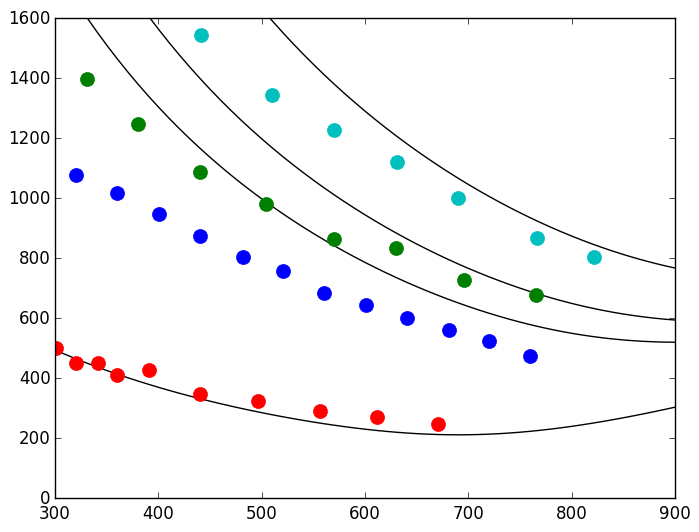

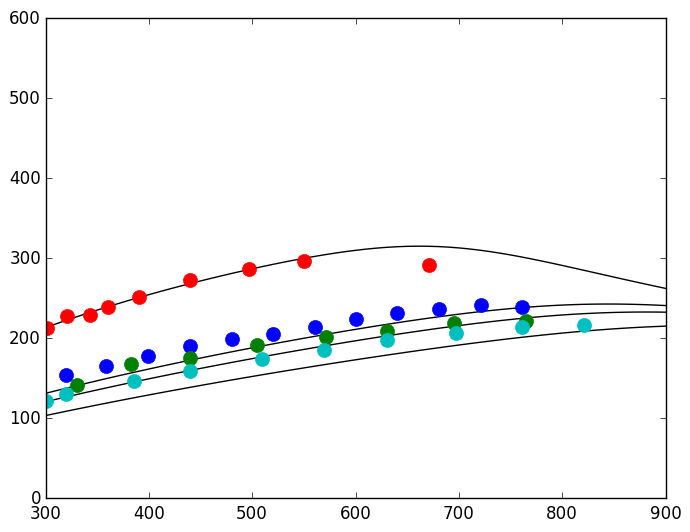

(0,600)

In [27]:
figure()
for p in 1:1:length(numofn)
    plot(Ts,sigmas[:,p]/100,linestyle="-",color="k")   
    #plot(Ts,sigmabandsout[:,p,1],linestyle="-.",linewidth="3",color="k")
    #plot(Ts,sigmabandsout[:,p,2],linestyle="-.",linewidth="3",color="b")
    #plot(Ts,sigmabandsout[:,p,3],linestyle="-.",linewidth="3",color="g")
    #plot(Ts,sigmabandsout[:,p,5],linestyle="-.",linewidth="3",color="r")
   # end
end
plot(ZMg2SiSn06S1TE,ZMg2SiSn06S1E, linestyle="None",marker=".",markersize=20,color="r")
plot(ZMg2SiSn06S2TE,ZMg2SiSn06S2E, linestyle="None",marker=".",markersize=20,color="b")
#plot(ASSimMg2SiT,ASSimMg2SiTE, linestyle="--",marker="None")
plot(ZMg2SiSn06S3TE,ZMg2SiSn06S3E, linestyle="None",marker=".",markersize=20,color="g")
plot(ZMg2SiSn06Sb075TE,ZMg2SiSn06Sb075E, linestyle="None",marker=".",markersize=20,color="c")
#plot(TKMg2Sn1T,TKMg2Sn1S, linestyle="None",marker=".",markersize=20)
ylim(0,1600)
figure()
for p in 1:1:length(numofn)
    plot(Ts,-1e6*seebecks[:,p],color="k") 
    #plot(Ts,seebeckbandsout[:,p,1],linestyle="-.",linewidth="3",color="k")
    #plot(Ts,seebeckbandsout[:,p,2],linestyle="-.",linewidth="3",color="b")
    #plot(Ts,seebeckbandsout[:,p,3],linestyle="-.",linewidth="3",color="g")
    #plot(Ts,seebeckbandsout[:,p,5],linestyle="-.",linewidth="3",color="r")
end
plot(ZMg2SiSn06S1TS,ZMg2SiSn06S1S, linestyle="None",marker=".",markersize=20,color="r")
plot(ZMg2SiSn06S2TS,ZMg2SiSn06S2S, linestyle="None",marker=".",markersize=20,color="b")
#plot(ASSimMg2SiT,ASSimMg2SiTS*-1, linestyle="--",marker="None")
plot(ZMg2SiSn06S3TS,ZMg2SiSn06S3S, linestyle="None",marker=".",markersize=20,color="g")
plot(ZMg2SiSn06Sb075TS,ZMg2SiSn06Sb075S, linestyle="None",marker=".",markersize=20,color="c")
#plot(TKMg2Sn1TS,TKMg2Sn1Se, linestyle="None",marker=".",markersize=20)
ylim(0,600)

In [28]:
sigmas/100

 8.992893 seconds (242.30 M allocations: 3.625 GB, 21.11% gc time)


61x4 Array{Float64,2}:
 2882.79   2121.69   1768.94   494.818
 2789.81   2053.68   1712.5    480.083
 2701.38   1988.88   1658.68   465.922
 2617.19   1927.09   1607.3    452.31 
 2536.97   1868.13   1558.22   439.225
 2460.44   1811.81   1511.3    426.644
 2387.39   1757.98   1466.42   414.545
 2317.58   1706.48   1423.45   402.908
 2250.83   1657.18   1382.29   391.713
 2186.94   1609.96   1342.84   380.939
 2125.75   1564.69   1305.01   370.57 
 2067.09   1521.26   1268.69   360.588
 2010.83   1479.58   1233.83   350.977
    ⋮                                 
  888.86    659.073   556.795  235.612
  874.628   650.134   550.534  240.322
  861.048   641.814   544.877  245.388
  848.117   634.115   539.828  250.795
  835.836   627.036   535.385  256.524
  824.204   620.586   531.545  262.557
  813.221   614.753   528.303  268.877
  802.887   609.538   525.651  275.466
  793.201   604.935   523.58   282.309
  784.16    600.938   522.079  289.39 
  775.762   597.538   521.133  296.695
  

In [29]:
seebecks*1e6

61x4 Array{Float64,2}:
 -103.571  -120.875  -131.374  -213.473
 -106.286  -123.912  -134.618  -218.107
 -108.968  -126.908  -137.814  -222.614
 -111.62   -129.865  -140.964  -227.001
 -114.242  -132.784  -144.069  -231.273
 -116.833  -135.664  -147.129  -235.434
 -119.396  -138.506  -150.145  -239.49 
 -121.93   -141.312  -153.118  -243.444
 -124.435  -144.082  -156.05   -247.301
 -126.913  -146.817  -158.94   -251.064
 -129.364  -149.517  -161.791  -254.738
 -131.788  -152.183  -164.602  -258.326
 -134.186  -154.816  -167.375  -261.83 
    ⋮                                  
 -205.422  -228.386  -241.076  -294.09 
 -206.687  -229.333  -241.718  -291.273
 -207.888  -230.179  -242.233  -288.403
 -209.024  -230.921  -242.62   -285.498
 -210.09   -231.555  -242.876  -282.576
 -211.084  -232.077  -243.002  -279.649
 -212.001  -232.487  -242.997  -276.731
 -212.839  -232.784  -242.864  -273.831
 -213.596  -232.967  -242.605  -270.958
 -214.269  -233.036  -242.224  -268.12 
 -214.856  -232.9